# Credit Card Fraud Detection
## Author: Saurabh Shinde


- **Importing all necessary libraries**

In [17]:
import numpy as np  
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import keras
plotly.offline.init_notebook_mode(connected=True)

- **Reading the .csv file and accessing the data**

In [18]:
data = pd.read_csv(r"D:\Work\0.ISE\FALL 20\ISE 535\Final Project\data\creditcard.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- **Visualizing the data to get information about class distribution viz normal/fraud**

Class
0    284315
1       492
dtype: int64


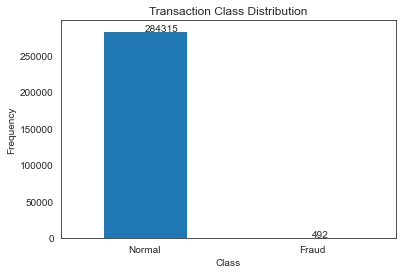

In [19]:
count_classes = pd.value_counts(data["Class"])

count_classes.plot(kind="bar", rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), ["Normal", "Fraud"])

plt.xlabel("Class")

plt.ylabel("Frequency")


for index, value in enumerate(pd.value_counts(data["Class"])):
   plt.text( index, value,str(value))

print(data.groupby('Class').size())

- **Correlation matrix of the dataset**

In [20]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0

- **Creating heat map of correlation matrix for better visualization**

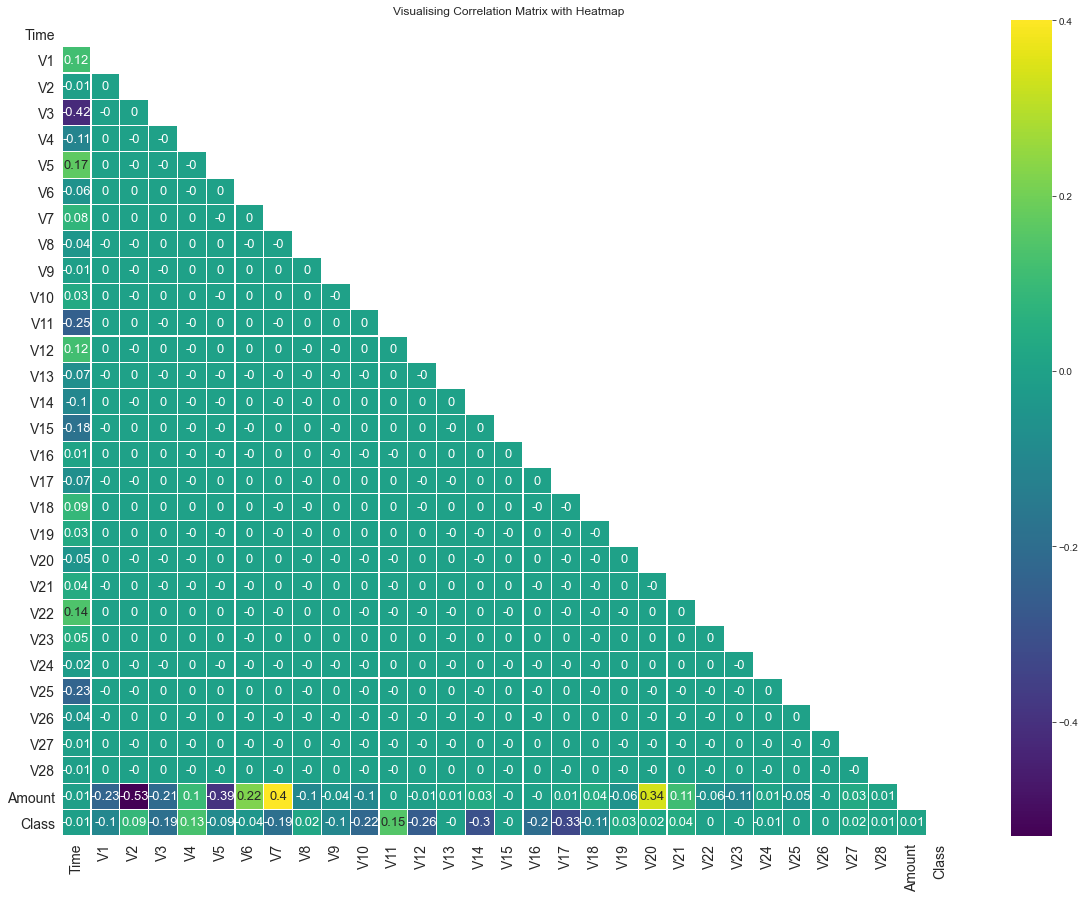

In [21]:
plt.figure(figsize=(20, 15))
sns.heatmap(
    round(data.corr(), 2),
    mask=mask,
    annot=True,
    annot_kws={"size": 13},
    cmap="viridis",
    linewidths=0.1,
).set_title("Visualising Correlation Matrix with Heatmap")
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Visualization for better understanding of postive or negative correlation with target for each parameter**

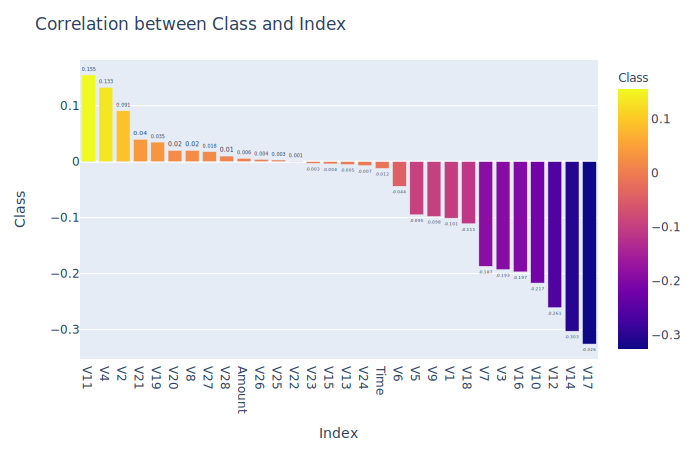

In [22]:
class_corr = (
    (pd.DataFrame(data.corr())["Class"].drop("Class"))
    .reset_index()
    .sort_values("Class", ascending=False)
    .round(3)
)
fig = px.bar(class_corr, x="index", y="Class", color="Class", text="Class")
fig.update_traces(textposition="outside")
fig.update_layout(
    title_text="Correlation between Class and Index",
    yaxis_title="Class",
    xaxis_title="Index",
)
fig.show('svg')

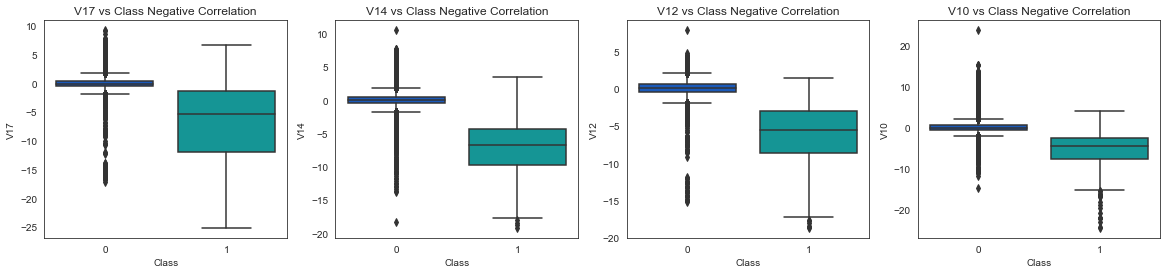

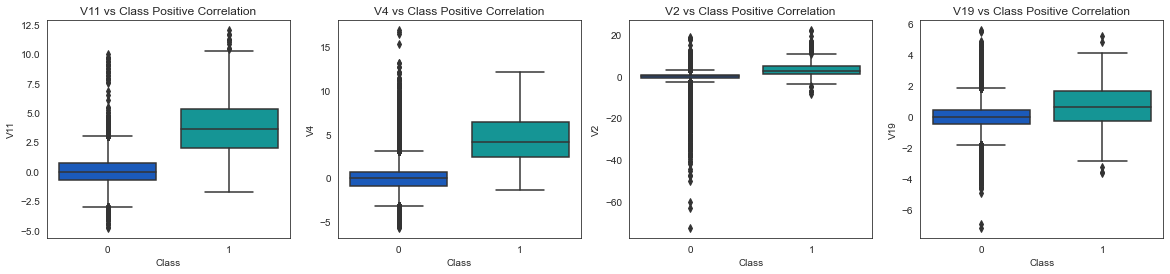

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V17", data=data, palette='winter', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=data, palette='winter', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=data, palette='winter', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=data, palette='winter', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=data, palette='winter', ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=data, palette='winter', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=data, palette='winter', ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=data, palette='winter', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

- **PCA's feature discription**

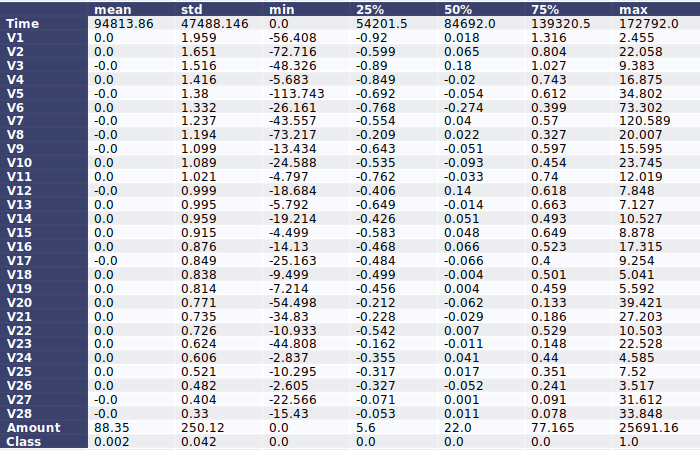

In [25]:
fig = ff.create_table(data.describe().round(3).drop("count").T, index=True)
fig.show('svg')

- **Handling data inbalance by generating hybrid samples by using SMOTE**

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_sample(data.drop(["Time", "Class"], axis=1), data.Class.values.ravel())

- **Minmax scaling the data and dividing it into training, validation and test set**

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.15, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.15, random_state=42)

X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)
X_test = scaler.transform(X_test)

- **Designing sequential deep learning model**

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential(
    [
        Dense(units=16, input_dim=29, activation="relu"),
        Dense(24, activation="relu"),
        Dropout(0.4),
        Dense(20, activation="relu"),
        Dense(24, activation="relu"),
        Dropout(0.4),
        Dense(1, activation="sigmoid"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

- **Model training and evaluation**

In [31]:
from keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate = 0.00001), loss="binary_crossentropy", metrics=["accuracy"])
r = model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data = (X_validate, y_validate))

Train on 410834 samples, validate on 72501 samples
Epoch 1/120
410834/410834 [==============================] - 34s 82us/step - loss: 0.6232 - accuracy: 0.6956 - val_loss: 0.4881 - val_accuracy: 0.9064
Epoch 2/120
410834/410834 [==============================] - 30s 72us/step - loss: 0.4322 - accuracy: 0.8579 - val_loss: 0.2701 - val_accuracy: 0.9252
Epoch 3/120
410834/410834 [==============================] - 29s 72us/step - loss: 0.2880 - accuracy: 0.9057 - val_loss: 0.1899 - val_accuracy: 0.9389
Epoch 4/120
410834/410834 [==============================] - 30s 72us/step - loss: 0.2318 - accuracy: 0.9220 - val_loss: 0.1687 - val_accuracy: 0.9416
Epoch 5/120
410834/410834 [==============================] - 30s 72us/step - loss: 0.2103 - accuracy: 0.9295 - val_loss: 0.1624 - val_accuracy: 0.9427
Epoch 6/120
410834/410834 [==============================] - 30s 73us/step - loss: 0.1997 - accuracy: 0.9336 - val_loss: 0.1594 - val_accuracy: 0.9427
Epoch 7/120
410834/410834 [================

Epoch 108/120
410834/410834 [==============================] - 29s 69us/step - loss: 0.1192 - accuracy: 0.9548 - val_loss: 0.1080 - val_accuracy: 0.9575
Epoch 109/120
410834/410834 [==============================] - 29s 70us/step - loss: 0.1187 - accuracy: 0.9544 - val_loss: 0.1073 - val_accuracy: 0.9582
Epoch 110/120
410834/410834 [==============================] - 29s 70us/step - loss: 0.1190 - accuracy: 0.9550 - val_loss: 0.1075 - val_accuracy: 0.9571
Epoch 111/120
410834/410834 [==============================] - 29s 70us/step - loss: 0.1185 - accuracy: 0.9550 - val_loss: 0.1069 - val_accuracy: 0.9580
Epoch 112/120
410834/410834 [==============================] - 29s 70us/step - loss: 0.1189 - accuracy: 0.9549 - val_loss: 0.1066 - val_accuracy: 0.9583
Epoch 113/120
410834/410834 [==============================] - 29s 70us/step - loss: 0.1183 - accuracy: 0.9548 - val_loss: 0.1066 - val_accuracy: 0.9586
Epoch 114/120
410834/410834 [==============================] - 29s 70us/step - los

- **Plotting training and validation curves** 

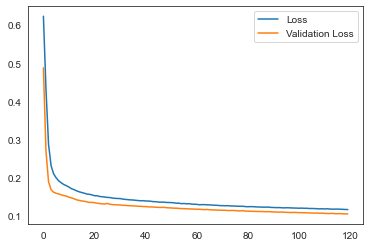

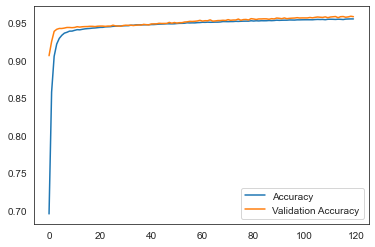

In [32]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

- **Plotting Confusion Matrix**

E:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning:

divide by zero encountered in log

E:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:2240: RuntimeWarning:

invalid value encountered in multiply



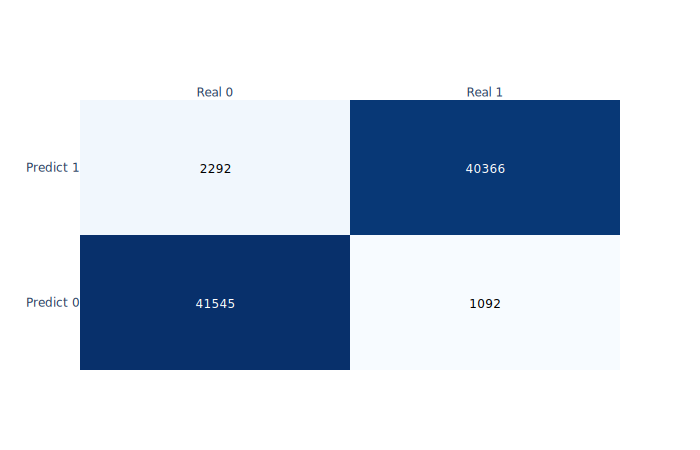

In [33]:
from plotly import figure_factory as ff, graph_objects as go
from sklearn.metrics import (
    log_loss,
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)

def metrics(y_true, y_pred, y_pred_class):
    ac = accuracy_score(y_true, y_pred)
    ll = log_loss(y_true, y_pred_class)
    f1 = f1_score(y_true, y_pred, zero_division=1)
    ps = precision_score(y_true, y_pred)
    mc = confusion_matrix(y_true, y_pred)
    rc = recall_score(y_true, y_pred)

    header = ["Metric", "Accuracy", "Loss(log)", "F1", "Precision", "Recall"]
    score = [
        "Score",
        round(ac, 3),
        round(ll, 3),
        round(f1, 3),
        round(ps, 3),
        round(rc, 3),
    ]

    x = ["Real 0", "Real 1"]
    y = ["Predict 0", "Predict 1"]

    fig = ff.create_table([header, score], height_constant=20)
    fig.show()

    fig = ff.create_annotated_heatmap(z=mc, x=x, y=y, colorscale="Blues")
    fig.show('svg')

y_pred = model.predict(X_test).round()
y_pred_class = model.predict_proba(X_test)
metrics(y_test, y_pred, y_pred_class)